In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
import io
#reading in CSV's 
df = pd.read_csv(io.BytesIO(uploaded['survey.csv']))
type(df)

pandas.core.frame.DataFrame

In [ ]:
#Pandas: What types of data do we have?
df.info()
#Pandas: whats the data row count?
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

(1259, 27)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


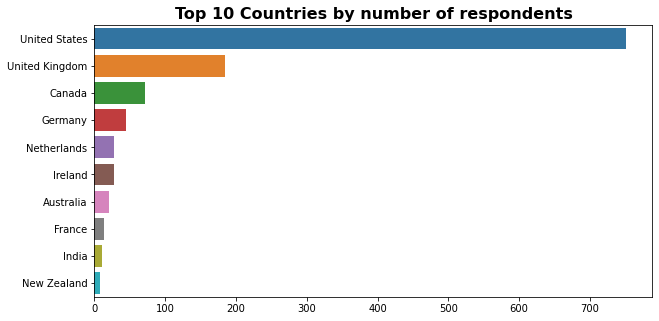

In [ ]:
top_10_countries = df['Country'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_countries['Country'],top_10_countries.index)
plt.title('Top 10 Countries by number of respondents',fontsize=16,fontweight="bold")
plt.xlabel('')
plt.show()

From the above chart, it is clear that Western counteries are more prone to mental illness.
Since, US has the maximun number, so we will focus on the inferences related to US

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


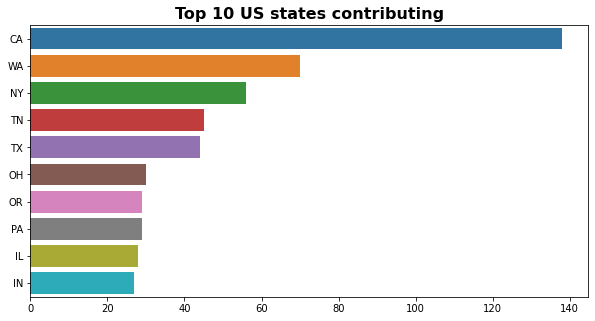

In [ ]:
usa = df.loc[df['Country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index)
plt.title('Top 10 US states contributing',fontsize=16,fontweight="bold")
plt.xlabel('')
plt.show()

In above chart you can see top 10 States of the USA.
# *CALIFORNIA is the state contributing the most in the survey with 138*
Indiannapolis is the state which is least contributing in the survey with 28

In [2]:
import numpy as np
usa = df.loc[df['Country'] == 'United States']

def clean_age(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
usa['Age'] = usa['Age'].apply(clean_age)
plt.figure(figsize=(10,5))
sns.distplot(usa['Age'].dropna())
plt.title("Age Distribution",fontsize=20,fontweight="bold")
plt.show()


NameError: name 'df' is not defined

**`Above Age distribution charts depicts that the mental illness problem is more common among young people between 25 to 35 years of age.`**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


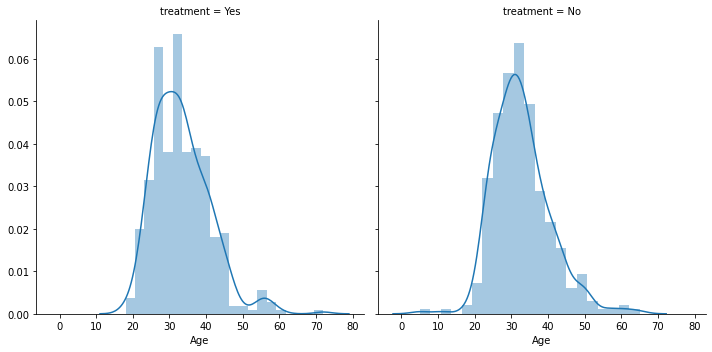

In [ ]:
g = sns.FacetGrid(usa, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

**`Above Age distribution charts depicts that mental illness is more with people who does not undergo any treatment`**

Yes           397
Don't know    236
No            117
Name: benefits, dtype: int64

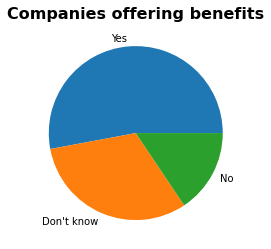

In [ ]:
usa = df.loc[df['Country'] == 'United States']
plt.pie(usa['benefits'].value_counts(),labels=usa['benefits'].unique())
plt.title("Companies offering benefits",fontsize=16,fontweight="bold")

usa['benefits'].value_counts()


Above Pie chart depicts that most of the companies are aware of Mental illness and offer benefits

No            455
Yes           166
Don't know    129
Name: wellness_program, dtype: int64

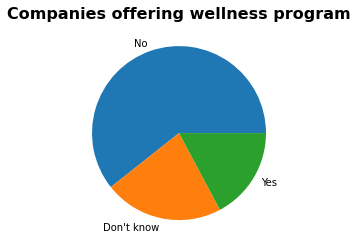

In [ ]:
usa = df.loc[df['Country'] == 'United States']

plt.pie(usa['wellness_program'].value_counts(),labels=usa['wellness_program'].unique())
plt.title("Companies offering wellness program",fontsize=16,fontweight="bold")

usa['wellness_program'].value_counts()

**Above Pie chart depicts that most of the companies in US do not offer any wellness program**

Yes             303
No              238
Some of them    209
Name: supervisor, dtype: int64

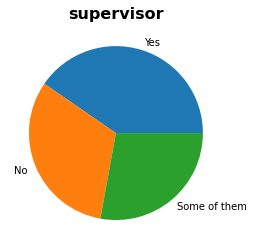

In [ ]:
usa = df.loc[df['Country'] == 'United States']

plt.pie(usa['supervisor'].value_counts(),labels=usa['supervisor'].unique())
plt.title("supervisor",fontsize=16,fontweight="bold")

usa['supervisor'].value_counts()

**Above charts shows that Mental illness is more common among Supervisor level which indicates that it might be due to stress level **

Male      562
Female    180
trans       8
Name: Gender, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


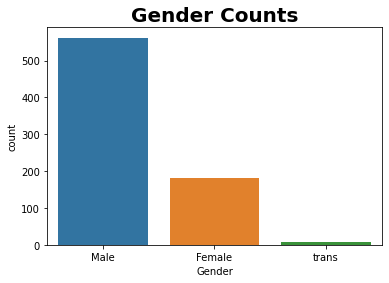

In [ ]:
usa = df.loc[df['Country'] == 'United States']

#Gender Count
sns.countplot('Gender',data = usa, order = usa['Gender'].value_counts().index)
print(usa['Gender'].value_counts())
plt.title("Gender Counts",fontsize=20,fontweight="bold")
plt.show()

Above charts depicts that the Male population suffers from Mental illness more as compared to other gender in US

Text(0.5, 1.0, 'Mental illness in tech companies')

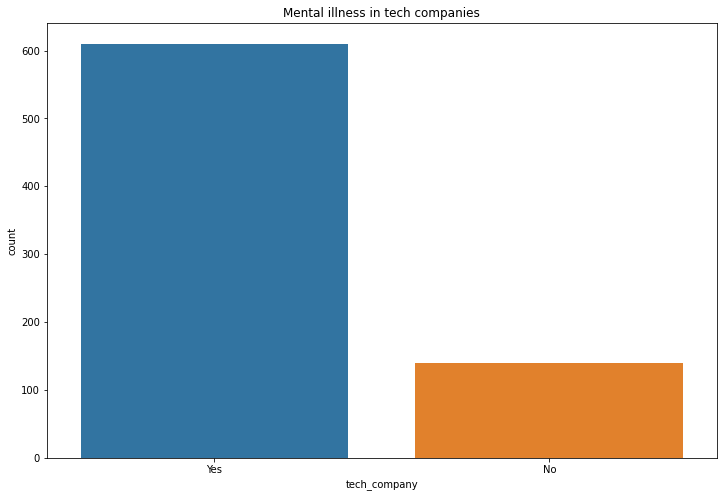

In [ ]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
g = sns.countplot(x="tech_company", data=usa)
plt.title('Mental illness in tech companies')

The above chart shows that the people working in Tech company are more prone to Mental problems. This indicates that work culture might be more demanding which leads to mental problems in youths.

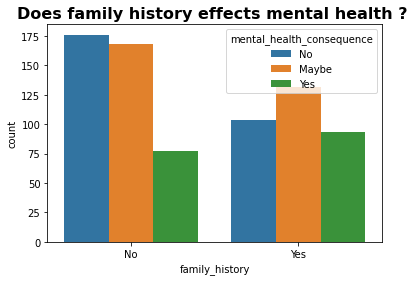

In [ ]:
sns.countplot(x="family_history", hue="mental_health_consequence", data=usa)
plt.title("Does family history effects mental health ? ",fontsize=16,fontweight="bold")
#plt.xlabel("")
plt.show()

The aboves proves that Mental issues are not hereditary and people having no family history can develop illness 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


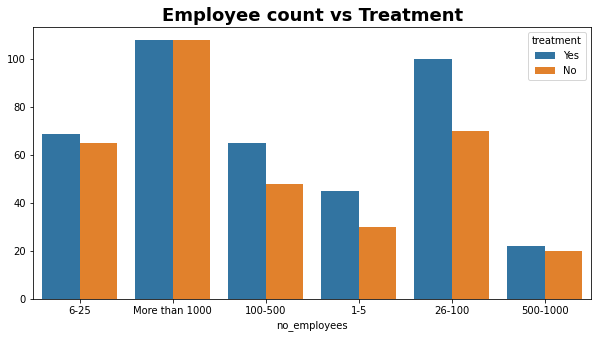

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=usa)
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

Above charts explains that undergoing treatment is normal and maximum employess goes for treamnet